In [18]:
import numpy as np
import sympy
sympy.init_printing()
from scipy.optimize import brentq, newton, minimize_scalar
from scipy.integrate import solve_ivp, solve_bvp
from scipy.special import erf
import matplotlib.pyplot as plt

In [19]:
x, t = sympy.symbols('x t')
v = sympy.Function('v')
w = sympy.Function('w')
Pi = sympy.Function('Pi')

# for differencing systems
v1 = sympy.Function('v1') 
v2 = sympy.Function('v2')
Pi1 = sympy.Function('Pi1')
Pi2 = sympy.Function('Pi2')

zeta = sympy.symbols('zeta', positive=True)
tau_Pi = sympy.symbols('tau_Pi', positive=True)
U, eta = sympy.symbols('U eta')
#U = 0
#tau_Pi, zeta = 1, 1

In [20]:
def f_bvp_generator_n(V, n=1):
    def f_bvp_fn(eta, q):
        u, du = q
        f = np.zeros_like(q)
        f[0, :] = du
        f[1, :] = n * u**(n-1) * (-V + u) * du # a = f' = u
        return f
    return f_bvp_fn

In [21]:
ql = 3
qr = 1
def bcs(qa, qb):
    return np.array([qa[0] - ql, qb[0] - qr])
V_guess = (ql+qr)/2

In [22]:
# Make initial guess be a straight line as it's easy to take the derivative
xi = np.linspace(-100, 100, 1000)
q_guess = np.zeros((2, len(xi)))
# This is now much closer to the "true" solution
smooth = 4
q_guess[0, :] = ql + (qr - ql) * (erf(xi/smooth) + 1)/2
q_guess[1, :] = (qr - ql) * np.exp(-xi**2/smooth**2) / np.sqrt(np.pi) / smooth

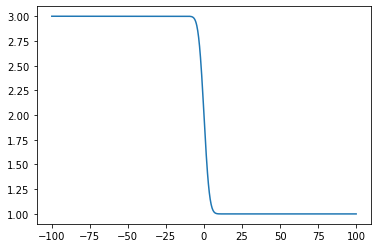

In [23]:
plt.plot(xi, q_guess[0, :])

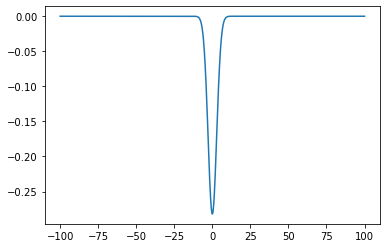

In [24]:
plt.plot(xi, q_guess[1, :])

In [26]:
n = 1
soln = solve_bvp(f_bvp_generator_n(V_guess, n=n), bcs, xi, q_guess)
soln.success

True

In [27]:
xi_plot = np.linspace(-100, 100, 1000)
plt.plot(xi_plot, soln.sol(eta_plot)[0, :], label=fr"$n={n}, V={V_guess:.2f}$")
plt.legend()
plt.xlabel(r"$\xi$")
plt.show()

NameError: name 'eta_plot' is not defined

In [ ]:
soln_V0 = solve_bvp(f_bvp_generator_n(1.99999, n=n), bcs, xi, q_guess)
soln_V0.success

In [28]:
xi_plot = np.linspace(-100, 100, 1000)
plt.plot(xi_plot, soln_V0.sol(eta_plot)[0, :], label=fr"$n={n}, V={V_guess:.2f}$")
plt.legend()
plt.xlabel(r"$\xi$")
plt.show()

NameError: name 'soln_V0' is not defined